**Electric Vehicule Stock Analysis and TSLA predict with LSMT**

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

TSLA=pd.read_excel('/kaggle/input/sotcks-2/TSLA.xlsx', index_col=0)
BYD=pd.read_excel('/kaggle/input/sotcks-2/BYD.xlsx', index_col=0)
MG=pd.read_excel('/kaggle/input/sotcks-2/GM.xlsx', index_col=0)
F=pd.read_excel('/kaggle/input/sotcks-2/F.xlsx', index_col=0)
# to see more details in de data just I am going to use 3 years of data of each stock
TSLA=TSLA.iloc[698:1256,:]
BYD=BYD.iloc[698:1256,:]
MG=MG.iloc[698:1256,:]
F=F.iloc[698:1256,:]
TSLA.info


/kaggle/input/sotcks-2/TSLA.xlsx
/kaggle/input/sotcks-2/F.xlsx
/kaggle/input/sotcks-2/BYD.xlsx
/kaggle/input/sotcks-2/GM.xlsx
/kaggle/input/stocks/TSLA.xlsx
/kaggle/input/stocks/F.xlsx
/kaggle/input/stocks/BYD.xlsx
/kaggle/input/stocks/GM.xlsx


<bound method DataFrame.info of             Close/Last     Volume     Open    High       Low
Date                                                        
2023-01-03      108.10  231402800  118.470  118.80  104.6400
2023-01-04      113.64  180389000  109.110  114.59  107.5200
2023-01-05      110.34  157986300  110.510  111.75  107.1601
2023-01-06      113.06  220911100  103.000  114.39  101.8100
2023-01-09      119.77  190284000  118.960  123.52  117.1100
...                ...        ...      ...     ...       ...
2025-03-19      235.86  111993800  231.610  241.41  229.2010
2025-03-20      236.26   99028270  233.345  238.00  230.0501
2025-03-21      248.71  132728700  234.985  249.52  234.5500
2025-03-24      278.39  169079900  258.075  278.64  256.3300
2025-03-25      288.14  150361500  283.600  288.20  271.2800

[558 rows x 5 columns]>

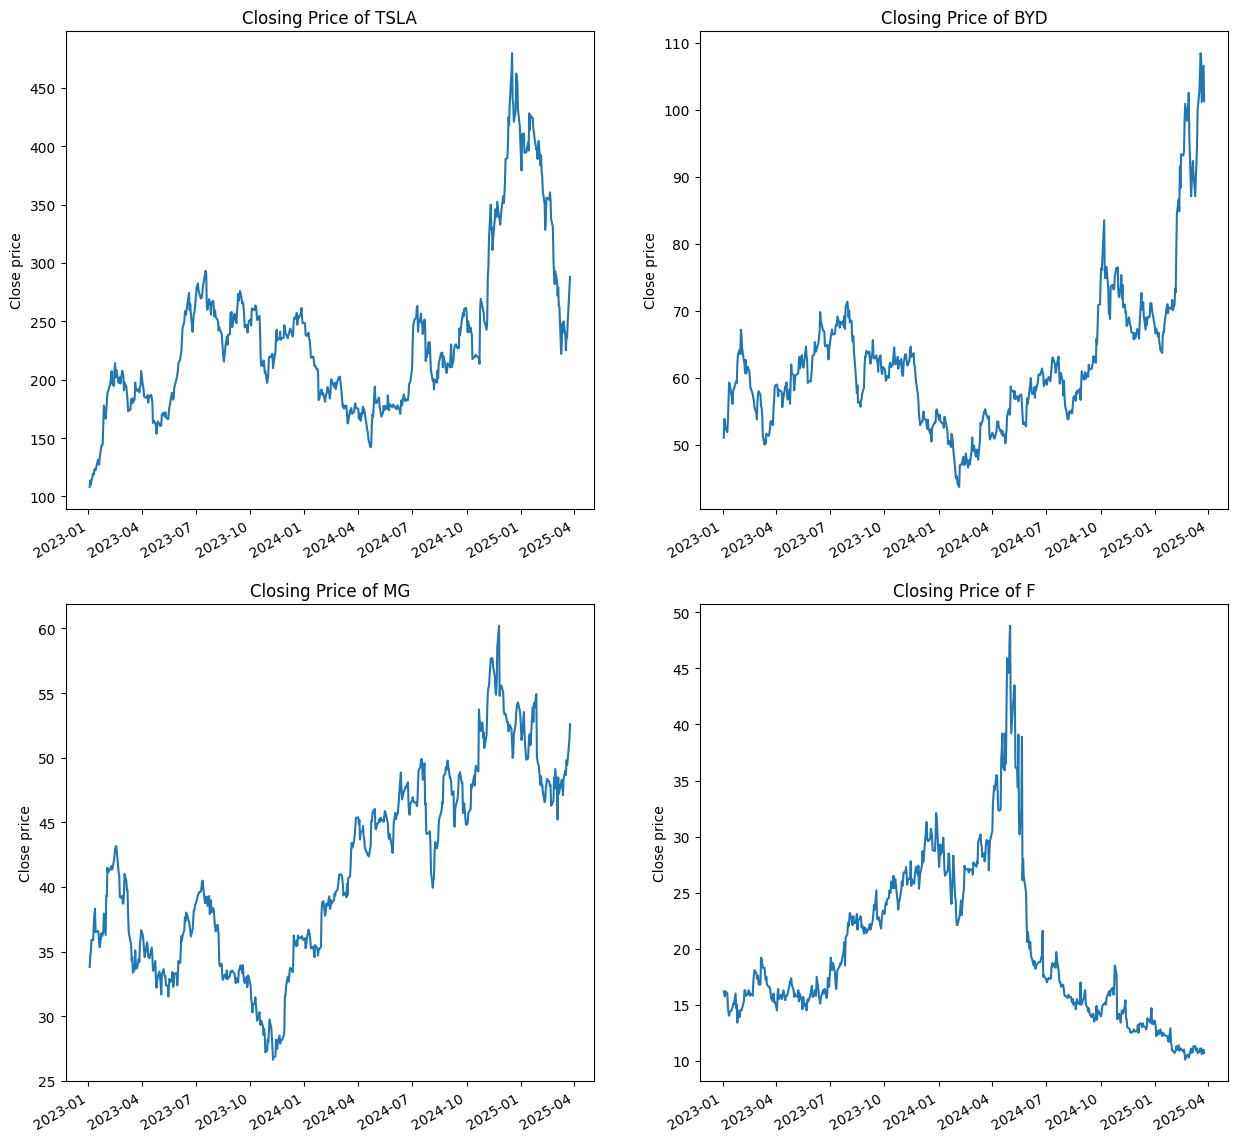

In [3]:
import matplotlib.pyplot as plt
# Let's see a historical view of the closing price
company_list = [TSLA, BYD, MG, F]
company_name = ["TSLA", "BYD", "MG","F"]
tech_list = ["TSLA", "BYD", "MG","F"]

plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Close/Last'].plot()
    plt.ylabel('Close price')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

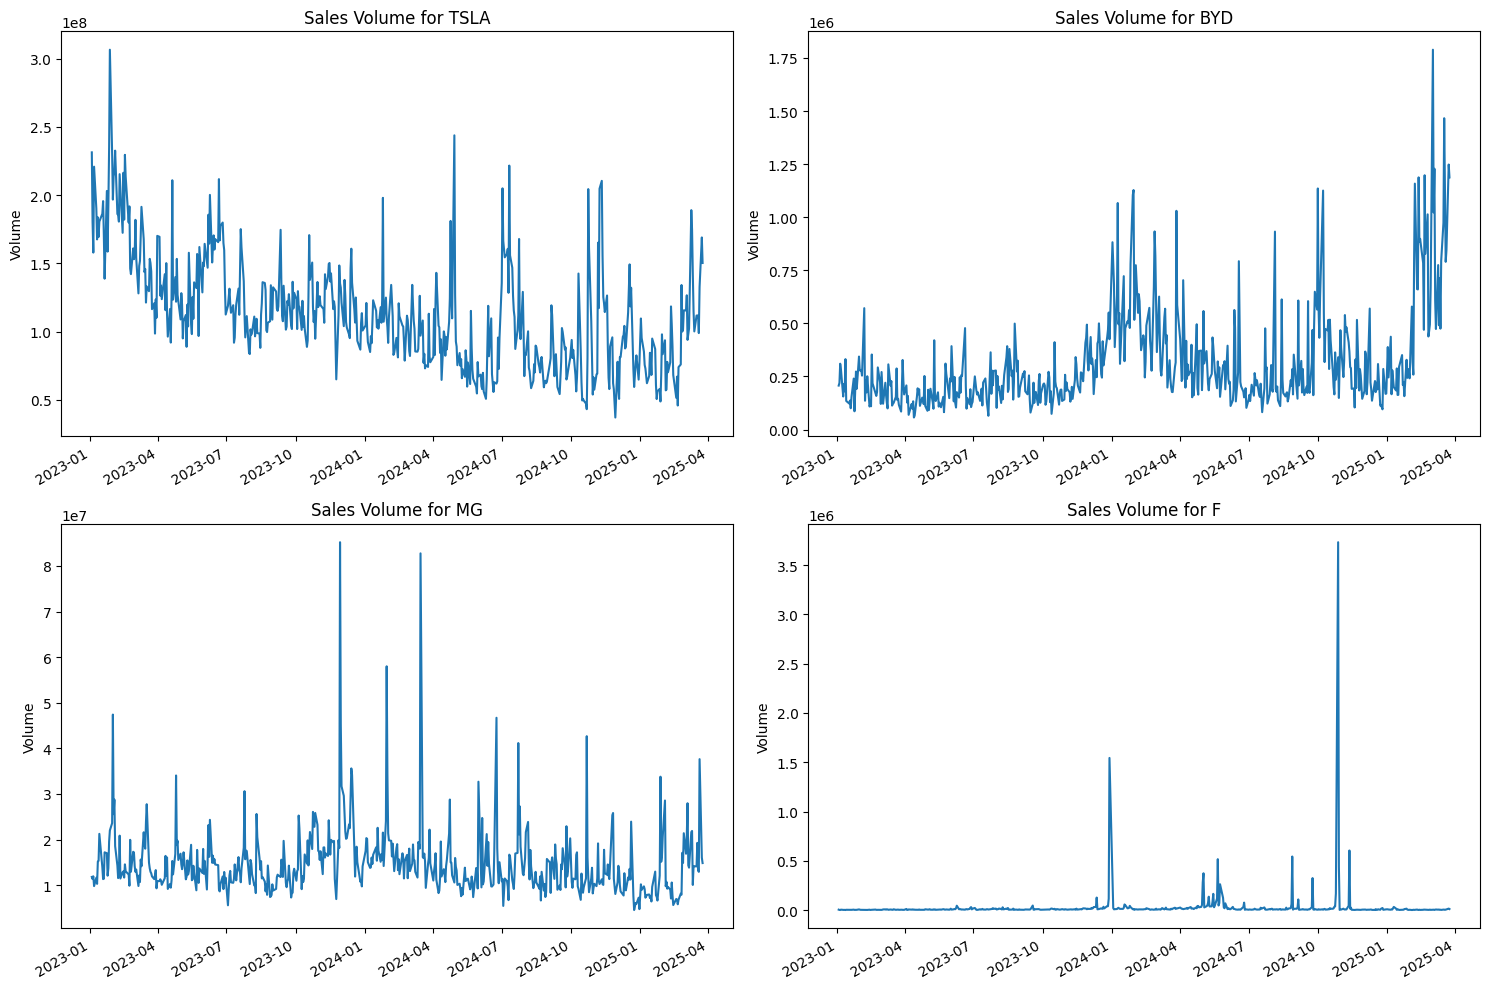

In [4]:
#NOw lets see volume 
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

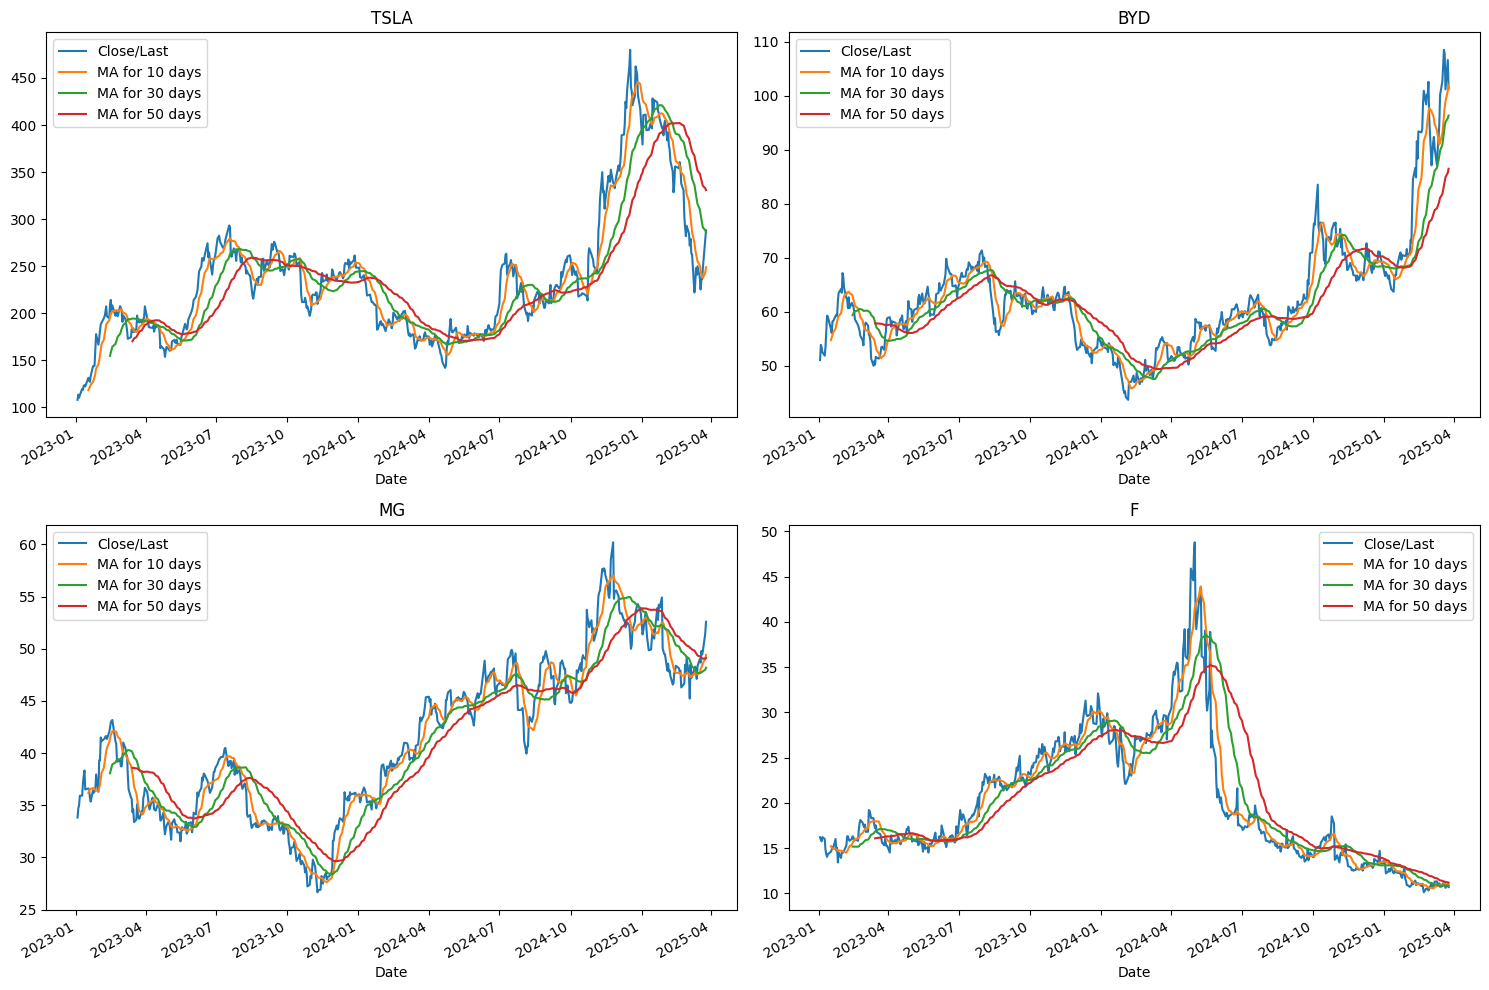

In [5]:
#NOw lets see moving average
ma_day = [10, 30, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Close/Last'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

TSLA[['Close/Last', 'MA for 10 days', 'MA for 30 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('TSLA')

BYD[['Close/Last', 'MA for 10 days', 'MA for 30 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('BYD')

MG[['Close/Last', 'MA for 10 days', 'MA for 30 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MG')

F[['Close/Last', 'MA for 10 days', 'MA for 30 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('F')

fig.tight_layout()

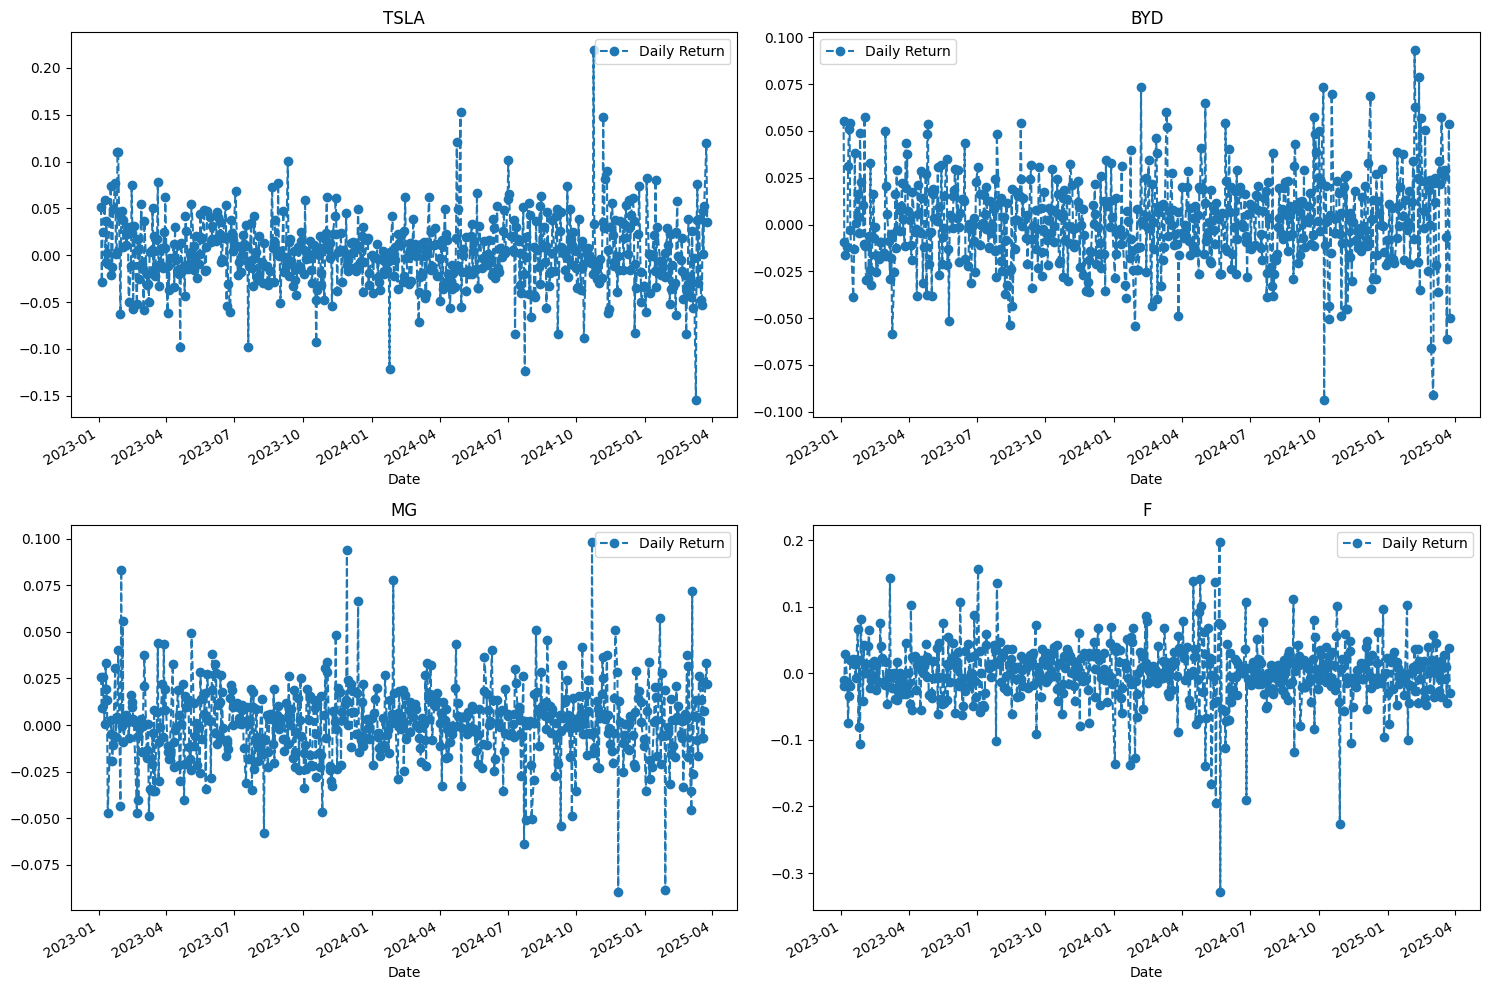

In [6]:
#DAYLY avergae return

# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Close/Last'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

TSLA['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('TSLA')

BYD['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('BYD')

MG['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MG')

F['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('F')

fig.tight_layout()

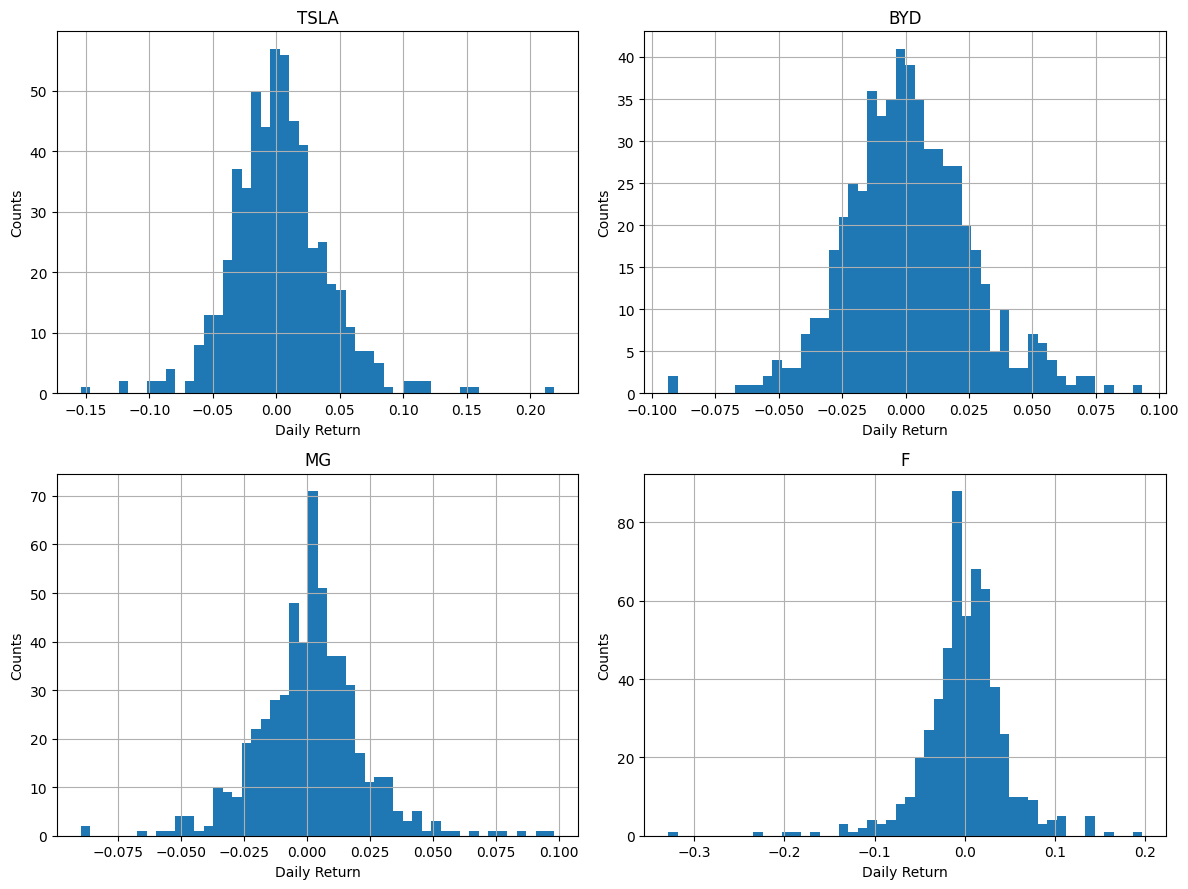

In [7]:
#Now lets see moving average in a historgram

plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [8]:
#now i want to see the correltation
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pd.concat([
                       TSLA[['Close/Last']],
                       BYD[['Close/Last']],
                       MG[['Close/Last']],
                       F[['Close/Last']]], axis=1)
closing_df.columns = tech_list
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,TSLA,BYD,MG,F
Date,,,,
2023-01-03,NaN,NaN,NaN,NaN
2023-01-04,0.051249,0.055251,0.025724,-0.018519
2023-01-05,-0.029039,-0.009283,0.008936,-0.009937
2023-01-06,0.024651,-0.016117,0.026000,0.029094
2023-01-09,0.059349,-0.012190,0.000278,-0.012346


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


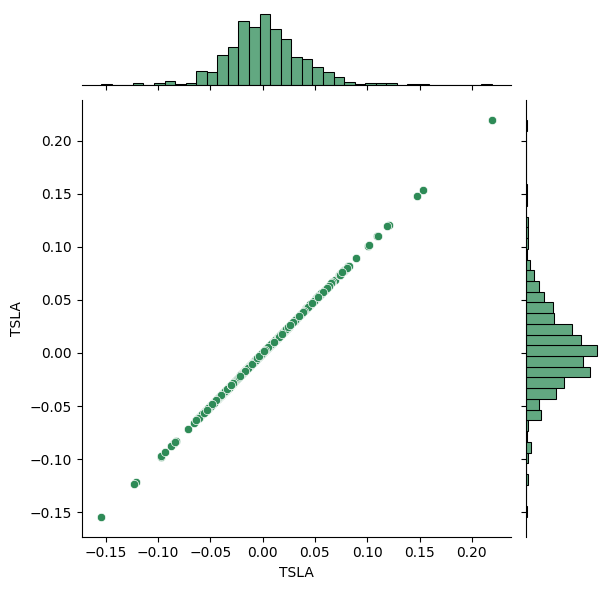

In [9]:
#Now I want to compare TSLA stock with the others
import seaborn as sns
# Comparing TSLA to itself should show a perfectly linear relationship
sns.jointplot(x='TSLA', y='TSLA', data=tech_rets, kind='scatter', color='seagreen')


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


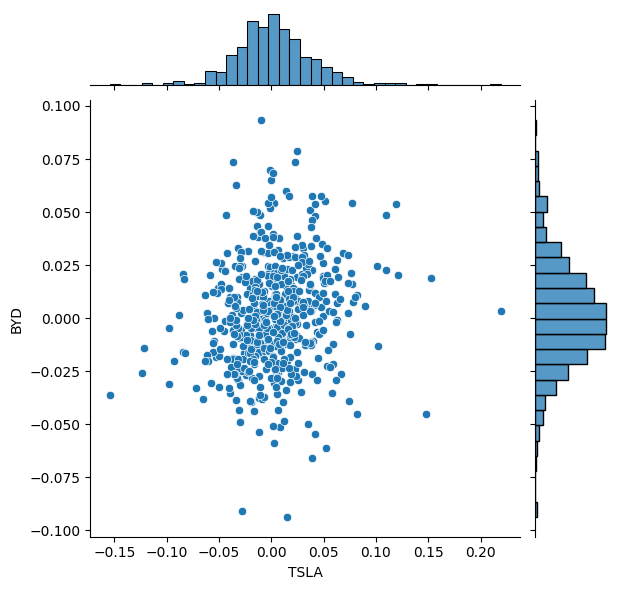

In [10]:
# We'll use joinplot to compare the daily returns of TSLA and BYD
sns.jointplot(x='TSLA', y='BYD', data=tech_rets, kind='scatter')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


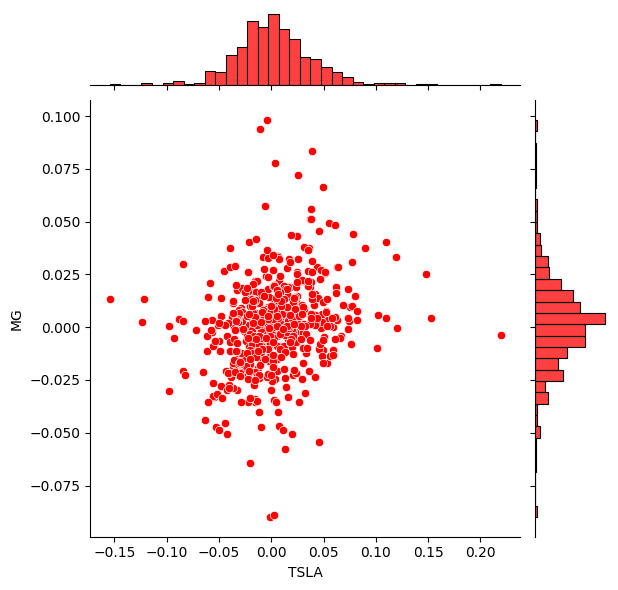

In [11]:
# We'll use joinplot to compare the daily returns of TSLA and MG
sns.jointplot(x='TSLA', y='MG', data=tech_rets, kind='scatter', color='red')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

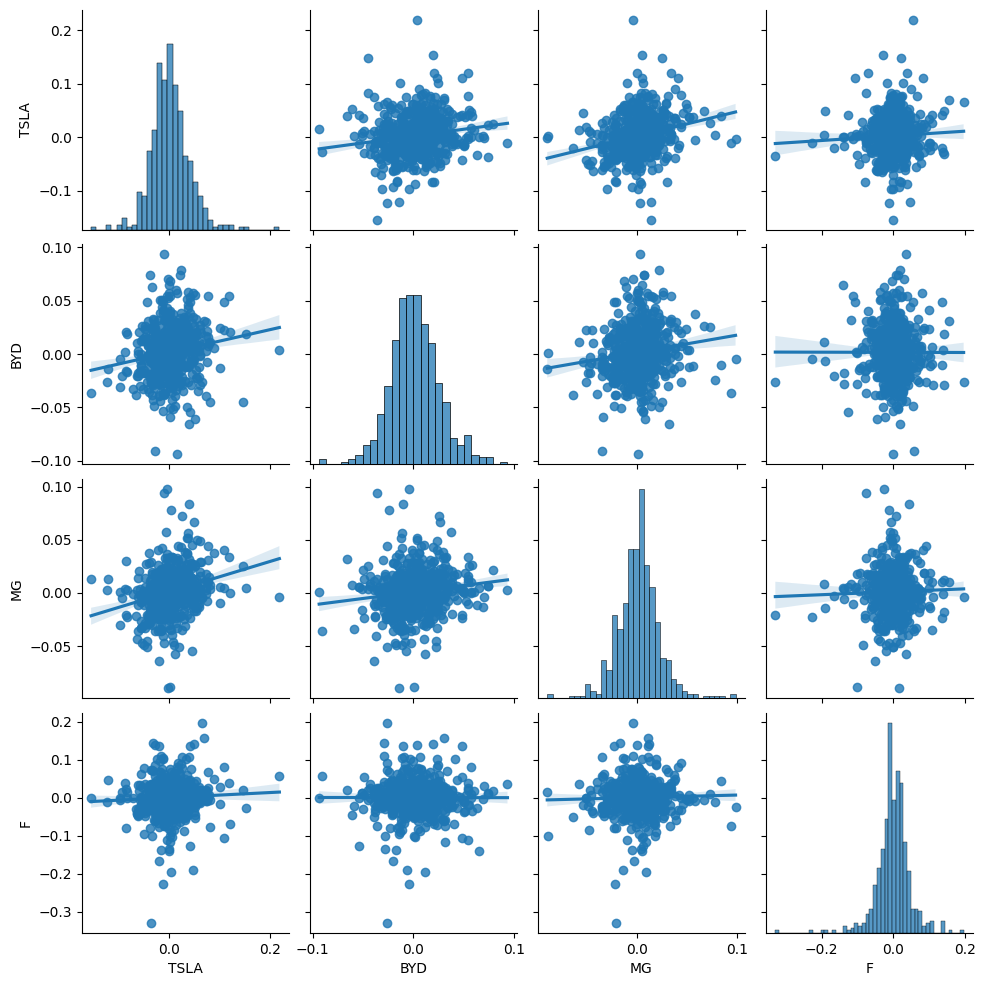

In [12]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

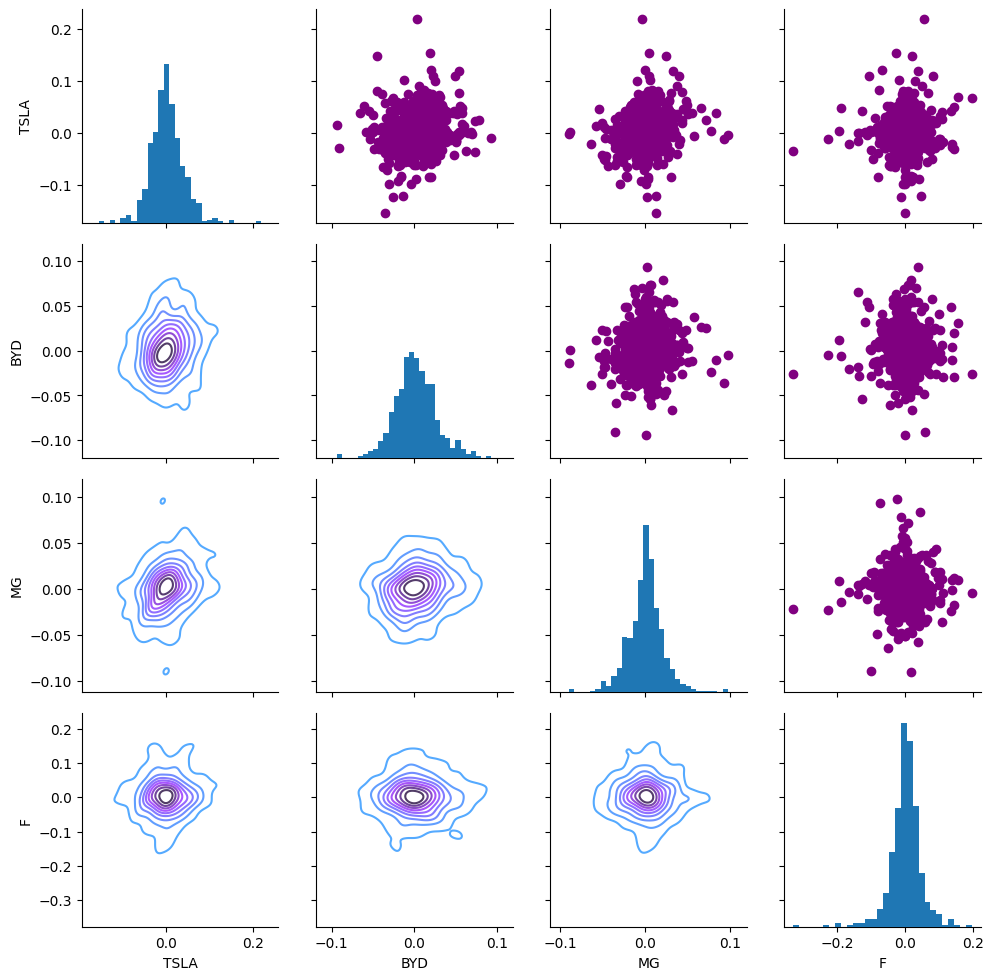

In [13]:
#using sns to show linearity

# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

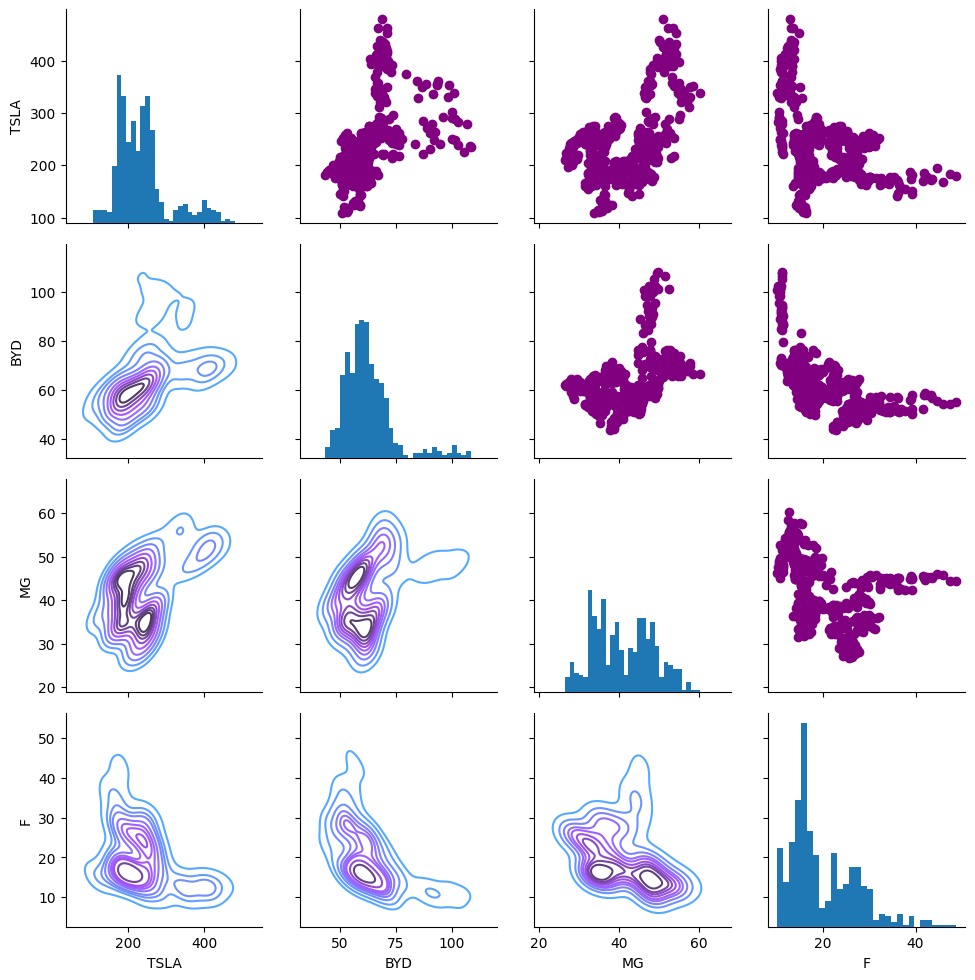

In [14]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

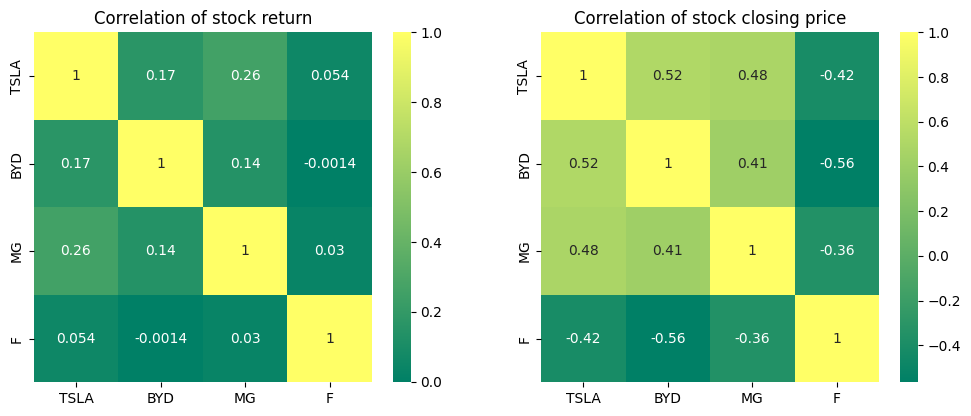

In [15]:
#now I want to watch correlation with numerical values

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

We can see clearily now that TSLA and BYD have strong correlation, a little more correlation between TSLA and MG, in another sense F stock is the symbol company with the lowest correlation among all

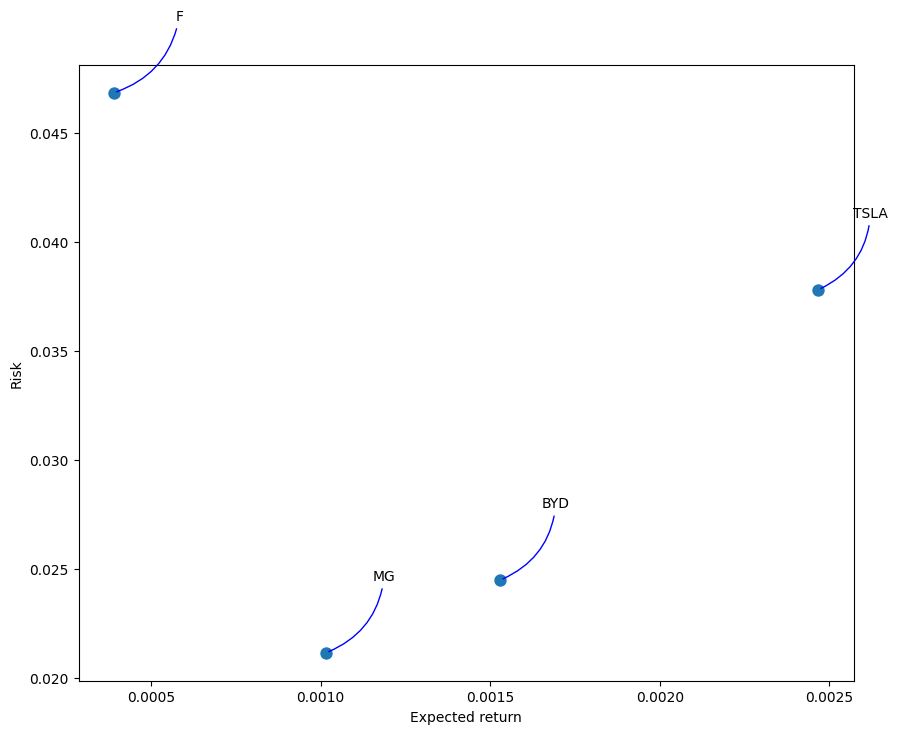

In [16]:
# Now I am going to calculate risk by investing in those stocks


rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

MG and BYD have better return and low risk than F and TSLA

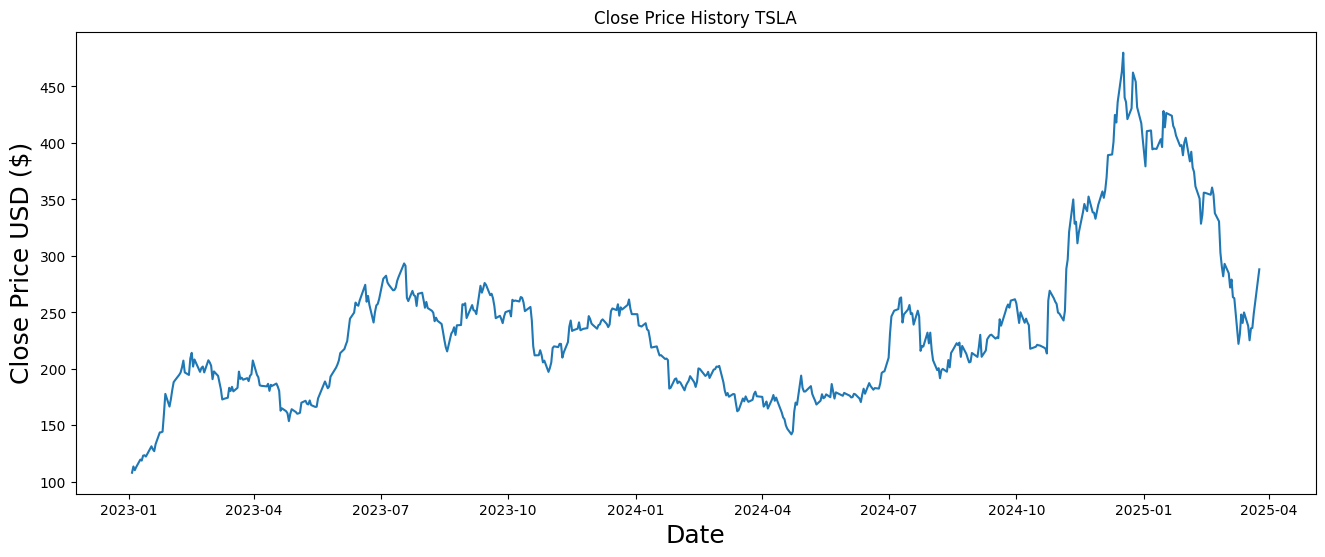

,close
Date,
2023-01-03,108.10
2023-01-04,113.64
2023-01-05,110.34
2023-01-06,113.06
2023-01-09,119.77
...,...
2025-03-19,235.86
2025-03-20,236.26
2025-03-21,248.71


In [52]:
#Now I am gonna predict the closing price of TSLA
df1 = TSLA[['Close/Last']]
df1=df1.rename(columns={'Close/Last': 'Close'})
close_stock = closedf.copy()

#ploting TSLA data after just using de 'Close/Last' column
plt.figure(figsize=(16,6))
plt.title('Close Price History TSLA')
plt.plot(df1['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

close_stock

In [53]:
# deleting date column and normalizing using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1));df1

array([[0.        ],
       [0.01490209],
       [0.00602539],
       [0.01334194],
       [0.03139122],
       [0.02891651],
       [0.0406714 ],
       [0.04158597],
       [0.03846568],
       [0.06291694],
       [0.05562729],
       [0.05129654],
       [0.06810846],
       [0.0958952 ],
       [0.09627179],
       [0.09772434],
       [0.14033247],
       [0.18775554],
       [0.15752098],
       [0.17516677],
       [0.19719712],
       [0.21564988],
       [0.22024962],
       [0.23310738],
       [0.23862169],
       [0.25067248],
       [0.26689262],
       [0.23883688],
       [0.23278459],
       [0.27208414],
       [0.28550678],
       [0.25268991],
       [0.26955563],
       [0.24012804],
       [0.24951582],
       [0.2527706 ],
       [0.23880998],
       [0.26772649],
       [0.26256187],
       [0.25465354],
       [0.22272434],
       [0.2412578 ],
       [0.23055197],
       [0.21414353],
       [0.19878416],
       [0.1743598 ],
       [0.17575855],
       [0.178

In [54]:
# we keep the training set as 60% and 40% testing set

##splitting dataset into train and test split
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
print(training_size,test_size)

418 140


In [130]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [131]:
print(X_train.shape), print(y_train.shape),print(X_test.shape), print(ytest.shape)

(387, 30)
(387,)
(109, 30)
(109,)


(None, None, None, None)

In [132]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [247]:
from tensorflow.keras.layers import LSTM, GRU
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mse',optimizer='adam')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                        │ (None, 30, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 30, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [248]:
history=model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=150,batch_size=32,verbose=0)

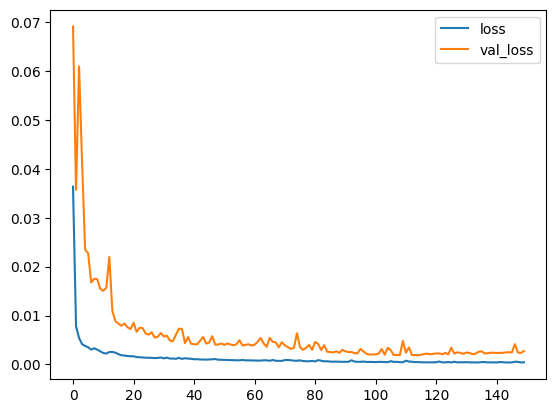

In [249]:
# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

In [250]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train) #prediction
test_predict=model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [251]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [252]:
#Calculate RMSE performance metrics
from sklearn.metrics import mean_squared_error
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(ytest,test_predict)))

212.7956471657764
336.4959813414696


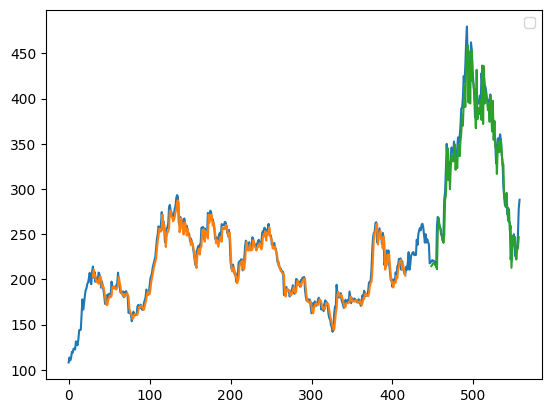

In [253]:
# shift train predictions for plotting
look_back=time_step
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend()
plt.show()

In [254]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1) #len(test_data)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [255]:
# demonstrate prediction for next 30 days
lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

len(lst_output)

[0.47974572]
31
1 day input [0.61440176 0.66666667 0.66639768 0.66174414 0.67909404 0.66252421
 0.61787175 0.59831612 0.52372498 0.49144609 0.46764041 0.49731009
 0.47490316 0.44098343 0.45997418 0.41787713 0.415779   0.30678395
 0.32945987 0.37656015 0.35662793 0.38164407 0.34944588 0.31528405
 0.34366258 0.34473854 0.37822789 0.45806434 0.48429094 0.47974572]
1 day output [[0.469386]]
2 day input [0.66666667 0.66639768 0.66174414 0.67909404 0.66252421 0.61787175
 0.59831612 0.52372498 0.49144609 0.46764041 0.49731009 0.47490316
 0.44098343 0.45997418 0.41787713 0.415779   0.30678395 0.32945987
 0.37656015 0.35662793 0.38164407 0.34944588 0.31528405 0.34366258
 0.34473854 0.37822789 0.45806434 0.48429094 0.47974572 0.46938601]
2 day output [[0.4573323]]
3 day input [0.66639768 0.66174414 0.67909404 0.66252421 0.61787175 0.59831612
 0.52372498 0.49144609 0.46764041 0.49731009 0.47490316 0.44098343
 0.45997418 0.41787713 0.415779   0.30678395 0.32945987 0.37656015
 0.35662793 0.38164407

30

In [256]:
day_new=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10]
[31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60]


array([31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
       48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60])

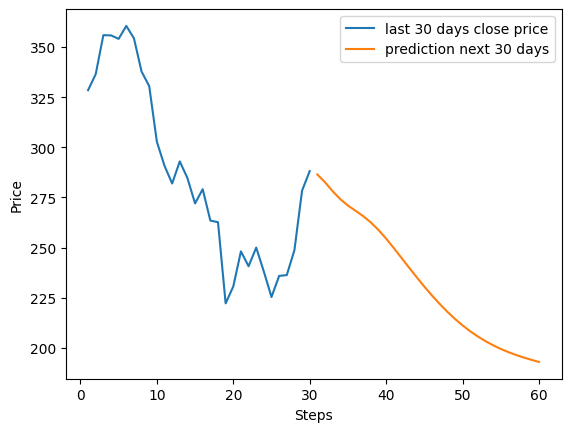

In [257]:
plt.plot(day_new,scaler.inverse_transform(df1[558-time_step:]),label='last 30 days close price') #len(df1)
plt.plot(day_pred,scaler.inverse_transform(lst_output),label='prediction next 30 days')

plt.xlabel('Steps')
plt.ylabel('Price')
plt.legend()

day_pred

[[286.4502673268318],
 [282.5989435839653],
 [278.1178607034683],
 [274.12921997547147],
 [270.9802248597145],
 [268.34215218782424],
 [265.66249886035916],
 [262.522610938549],
 [258.76662467002865],
 [254.45453452587125],
 [249.7655372881889],
 [244.89233541965484],
 [239.99356250047683],
 [235.17631115436552],
 [230.51955471277236],
 [226.08143740177152],
 [221.89794482469557],
 [218.00480776071547],
 [214.4210826253891],
 [211.1720524072647],
 [208.248177819252],
 [205.63082345962522],
 [203.30620666503904],
 [201.24583144664763],
 [199.42872466802595],
 [197.82921556472778],
 [196.41103601098058],
 [195.14669269561767],
 [194.00396698117254]]

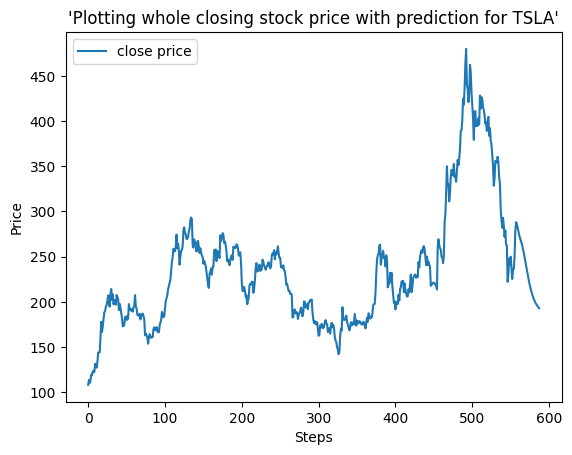

In [260]:
#Ploting all the price stock prediction
df3=df1.tolist()
df3.extend(lst_output)
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3,label="close price")
plt.xlabel('Steps')
plt.ylabel('Price')
plt.title("'Plotting whole closing stock price with prediction for TSLA'")
plt.legend()
# watching the data of the 30 days pred by the model
df3[-30:-1]